In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/correlates-of-the-trump-vote-in-2016/trum.csv', 
                index_col=['uid']).drop(columns=['Unnamed: 0'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64600 entries, 1 to 64600
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        64600 non-null  object 
 1   votetrump    44932 non-null  float64
 2   age          64600 non-null  int64  
 3   female       64600 non-null  int64  
 4   collegeed    64600 non-null  int64  
 5   racef        64600 non-null  object 
 6   famincr      58079 non-null  float64
 7   ideo         59815 non-null  float64
 8   pid7na       62479 non-null  float64
 9   bornagain    64557 non-null  float64
 10  religimp     64566 non-null  float64
 11  churchatd    63860 non-null  float64
 12  prayerfreq   63087 non-null  float64
 13  angryracism  52834 non-null  float64
 14  whiteadv     52837 non-null  float64
 15  fearraces    52775 non-null  float64
 16  racerare     52778 non-null  float64
 17  lrelig       64596 non-null  float64
 18  lcograc      52898 non-null  float64
 19  lemp

In [2]:
df.head()

,state,votetrump,age,female,collegeed,racef,famincr,ideo,pid7na,bornagain,religimp,churchatd,prayerfreq,angryracism,whiteadv,fearraces,racerare,lrelig,lcograc,lemprac
uid,,,,,,,,,,,,,,,,,,,,
1,New Hampshire,1.0,47,1,0,White,NaN,3.0,5.0,0.0,3.0,1.0,3.0,2.0,3.0,1.0,3.0,-0.191681,0.475294,-0.138715
2,Louisiana,1.0,22,1,0,White,6.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0,4.0,1.0,1.0,NaN,-0.185682,-0.619427
3,Missouri,NaN,52,1,0,Black,4.0,5.0,1.0,0.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN,0.573060,NaN,NaN
4,Alabama,NaN,28,1,0,Black,1.0,4.0,4.0,0.0,3.0,3.0,5.0,NaN,NaN,NaN,NaN,0.069356,NaN,NaN
5,Colorado,0.0,34,1,1,White,7.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,-1.130175,-1.204085,-0.138715


<Axes: >

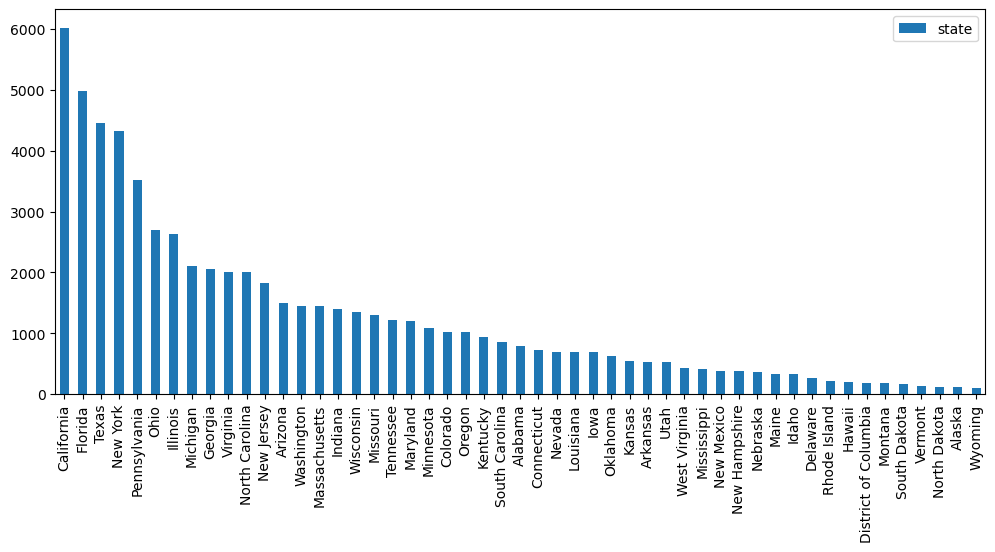

In [3]:
df['state'].value_counts().plot(figsize=(12, 5), kind='bar', legend=True)

<Axes: ylabel='Frequency'>

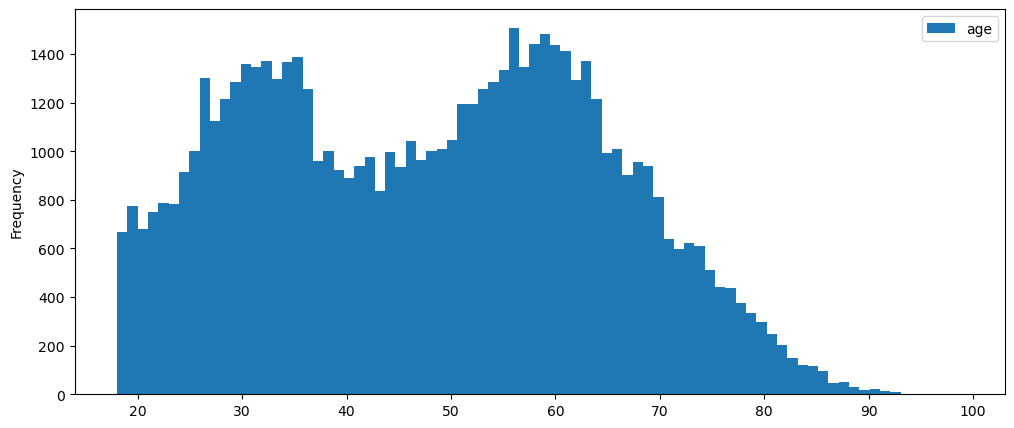

In [4]:
df['age'].plot.hist(bins=1 + df['age'].max() - df['age'].min(), figsize=(12, 5), legend=True)

<Axes: ylabel='Frequency'>

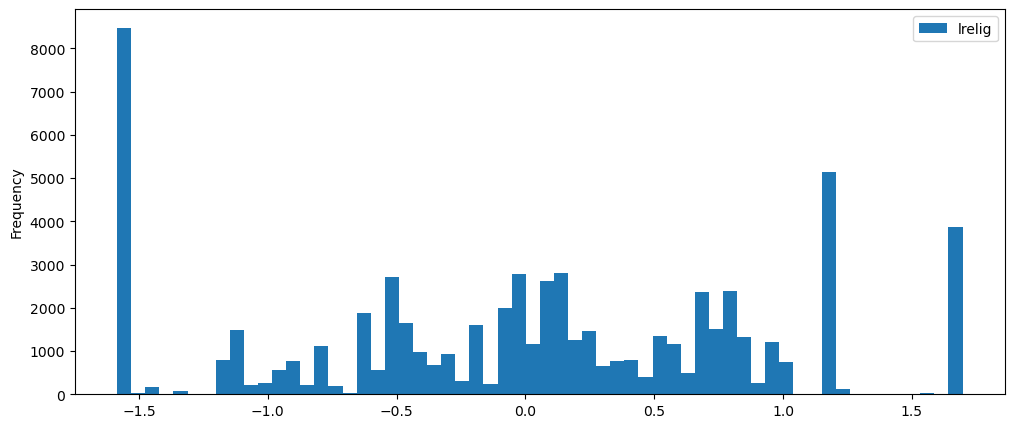

In [5]:
df['lrelig'].plot.hist(bins=60, figsize=(12, 5), legend=True)

<Axes: ylabel='Frequency'>

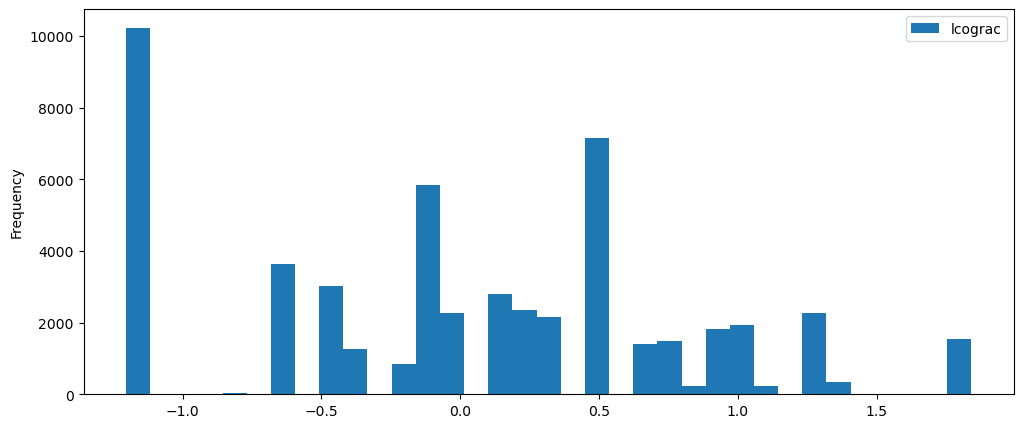

In [6]:
df['lcograc'].plot.hist(bins=35, figsize=(12, 5), legend=True)

<Axes: ylabel='Frequency'>

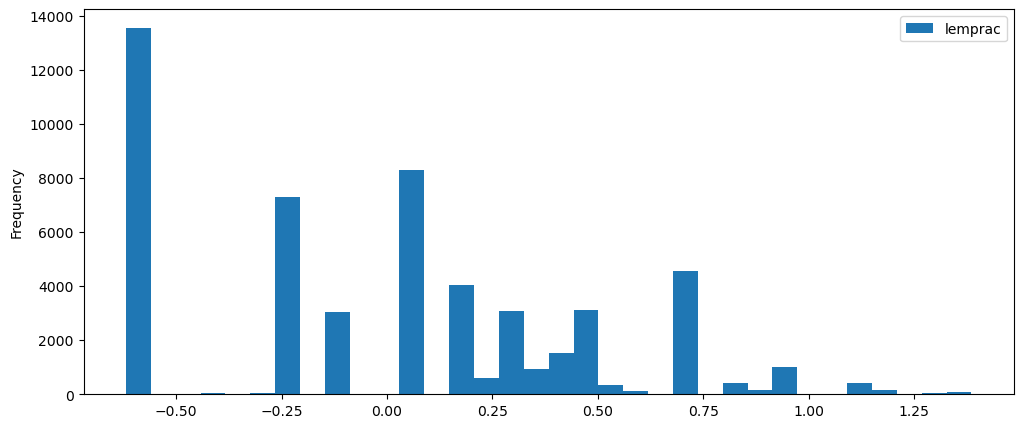

In [7]:
df['lemprac'].plot.hist(bins=34, figsize=(12, 5), legend=True)

In [8]:
df.nunique()

state           51
votetrump        2
age             80
female           2
collegeed        2
racef            8
famincr         12
ideo             5
pid7na           7
bornagain        2
religimp         4
churchatd        6
prayerfreq       7
angryracism      5
whiteadv         5
fearraces        5
racerare         5
lrelig         240
lcograc         35
lemprac         34
dtype: int64

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


got data: (10000, 4) in  0.01s
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.010s...
[t-SNE] Computed neighbors for 10000 samples in 0.295s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.505432
[t-SNE] KL divergence after 1000 iterations: 0.3

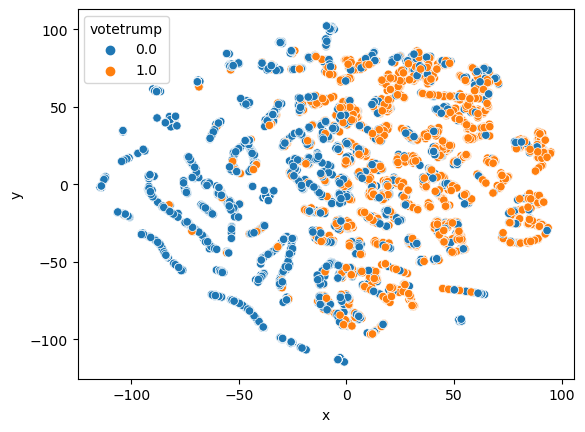

In [9]:
from arrow import now
from matplotlib.pyplot import subplots
from seaborn import scatterplot
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

sample_size = 10000
lcolumns = ['lrelig', 'lcograc', 'lemprac']
time_start = now()
reduced_df = df[lcolumns + ['votetrump']].dropna().sample(n=sample_size)
print('got data: {} in {:5.2f}s'.format(reduced_df.shape, (now() - time_start).total_seconds(), ))
model_result = TSNE(random_state=2023, verbose=1).fit_transform(X=MinMaxScaler(copy=True).fit_transform(X=reduced_df[lcolumns].astype(float)))
print('built model: n = {} in {:5.2f}s'.format(len(model_result), (now() - time_start).total_seconds(), ))
scatterplot(data=pd.DataFrame(data={'x': model_result[:, 0],'y': model_result[:, 1],'votetrump': reduced_df['votetrump'].values}),
            hue='votetrump', x='x', y='y',)
print('done in {:5.2f}s'.format((now() - time_start).total_seconds(), ))